In [6]:
eps = 1e-20

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x, t = sp.symbols("x t")

a = 3
phi = sp.ln(1 - x**2) + 1
psi = 0.1 * sp.cos(x) ** 2

right = (sp.ln(1 - (x - 3 * t) ** 2) + 2 + sp.ln(1 - (x + 3 * t) ** 2)) / 2
left = 1 / (2 * a) * sp.integrate(psi, (x, x - 3 * t, x + 3 * t))

eq = right + left

eq

0.05*t + log(1 - (-3*t + x)**2)/2 + log(1 - (3*t + x)**2)/2 + 0.00833333333333333*sin(3*t - x)*cos(3*t - x) + 0.00833333333333333*sin(3*t + x)*cos(3*t + x) + 1

In [2]:
sp.diff(eq, t, t)

-18*(3*t - x)**2/((3*t - x)**2 - 1)**2 - 18*(3*t + x)**2/((3*t + x)**2 - 1)**2 - 0.3*sin(3*t - x)*cos(3*t - x) - 0.3*sin(3*t + x)*cos(3*t + x) + 9/((3*t + x)**2 - 1) + 9/((3*t - x)**2 - 1)

In [3]:
sp.diff(eq, x, x)

-2*(3*t - x)**2/((3*t - x)**2 - 1)**2 - 2*(3*t + x)**2/((3*t + x)**2 - 1)**2 - 0.0333333333333333*sin(3*t - x)*cos(3*t - x) - 0.0333333333333333*sin(3*t + x)*cos(3*t + x) + 1/((3*t + x)**2 - 1) + 1/((3*t - x)**2 - 1)

In [4]:
check = sp.diff(eq, t, t) - a**2 * sp.diff(eq, x, x)

check

-5.55111512312578e-17*sin(3*t - x)*cos(3*t - x) - 5.55111512312578e-17*sin(3*t + x)*cos(3*t + x)

C:\Users\kirde\AppData\Local\Temp\ipykernel_35008\2542678674.py:5: RuntimeWarning: invalid value encountered in log
  return np.where(np.abs(x) <= 0.75, np.log(1 - x**2) + 1, 0)
C:\Users\kirde\AppData\Local\Temp\ipykernel_35008\2542678674.py:5: RuntimeWarning: divide by zero encountered in log
  return np.where(np.abs(x) <= 0.75, np.log(1 - x**2) + 1, 0)


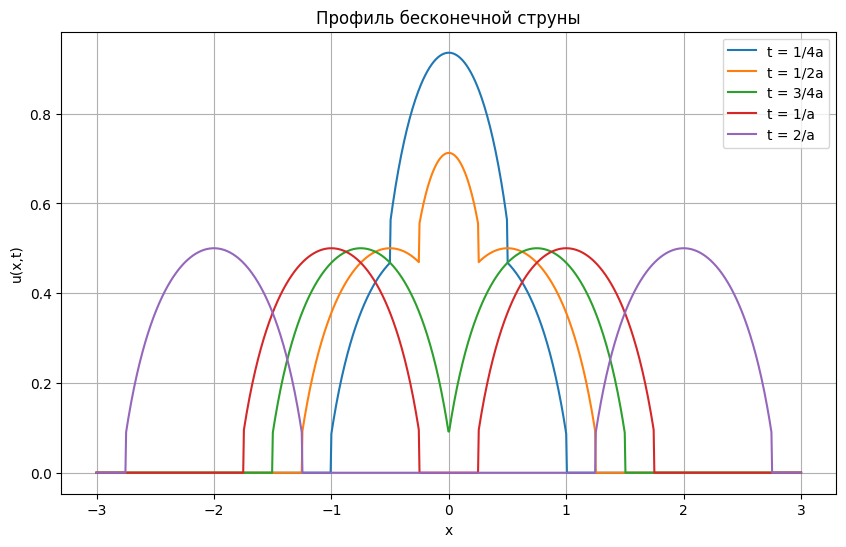

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(np.abs(x) <= 0.75, np.log(1 - x**2) + 1, 0)

def d_alembert(x, t, a=3):
    return 0.5 * (f(x - a*t) + f(x + a*t))

x = np.linspace(-3, 3, 1000)

a = 3
times = [1/(4*a), 1/(2*a), 3/(4*a), 1/a, 2/a]
times_print = ["1/4a", "1/2a", "3/4a", "1/a", "2/a"]

# Построение графиков
plt.figure(figsize=(10,6))

for t, t_pr in zip(times, times_print):
    plt.plot(x, d_alembert(x, t, a), label=f't = {t_pr}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Профиль бесконечной струны')
plt.legend()
plt.grid()
plt.show()